In [92]:
import pandas as pd

Data = "C:\\Users\\alan1\\Downloads\\Data.csv"
df = pd.read_csv(Data)
NCAP_Funding="C:\\Users\\alan1\\Downloads\\NCAP_Funding.csv"
ncap=pd.read_csv(NCAP_Funding)
state_data="C:\\Users\\alan1\\Downloads\\State_data.csv"
population=pd.read_csv(state_data)

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Spatial aggregation

Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [3]:
#to handle the missing file
# df["PM2.5"]=pd.to_numeric(df["PM2.5"],errors="coerce")
df= df.dropna(subset=['PM2.5'])
State_avg_PM=df.groupby("state")["PM2.5"].mean()
highest_avg_state=State_avg_PM.idxmax()
highest_avg_PM=State_avg_PM.max()
print("The state with the highest average PM2.5 concentration across all stations and across all years is",highest_avg_state,"with an average of",highest_avg_PM," µg/m³")

The state with the highest average PM2.5 concentration across all stations and across all years is Delhi with an average of 104.1009176780069  µg/m³


Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [4]:
df["Timestamp"]=pd.to_datetime(df["Timestamp"],format='mixed')
data_2023=df[df['Timestamp'].dt.year==2023]
state_pm_var=data_2023.groupby('state')['PM2.5'].std()

# mask1=df["PM2.5"]>300
# mask2=df["Timestamp"].dt.year==2023
# df_filtered=df[mask1 & mask2]
# df_filtered["Date"] = df_filtered["Timestamp"].dt.date
# State_count_PM=df_filtered.groupby("state")["Date"].nunique()
highest_count_state=state_pm_var.idxmax()
highest_count_PM=state_pm_var.max()
print("The state with the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023 is",highest_count_PM,"with",highest_count_PM,"days")

The state with the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023 is 82.79710576209911 with 82.79710576209911 days


In [5]:
mask1=df["Timestamp"].dt.year==2023
timestamp=df[mask1]
State_var_PM=timestamp.groupby("state")["PM2.5"].std()
highest_var_state=State_var_PM.idxmax()
highest_var_PM=State_var_PM.max()
print("The state has the highest variability in PM2.5 levels across its monitoring stations in 2023",highest_var_state,"with",highest_var_PM)

The state has the highest variability in PM2.5 levels across its monitoring stations in 2023 Delhi with 82.79710576209911


Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [6]:
mask1=df["Timestamp"].dt.year==2021
mask2=df["Timestamp"].dt.year==2020
df_filtered=df[mask1 | mask2]
State_avg_PM=df_filtered.groupby("state")["PM2.5"].mean()
lowest_avg_state=State_avg_PM.idxmin()
lowest_avg_PM=State_avg_PM.min()
print("The state has the lowest average PM2.5 levels during the covid period",lowest_avg_state,"with",lowest_avg_PM)

The state has the lowest average PM2.5 levels during the covid period Mizoram with 14.323350150801287


# Temporal Aggregation

Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [7]:
mask1=df["Timestamp"].dt.year==2020
mask2=df["Timestamp"].dt.month==8
df_filtered=df[mask1 & mask2]
Station_max_PM=df_filtered.groupby("station")["PM2.5"].max()
highest_max_station=Station_max_PM.idxmax()
highest_max_PM=Station_max_PM.max()
print("The station that recorded the highest value of PM 2.5 for the month Aug of 2020 is",highest_max_station,"with",highest_max_PM)

The station that recorded the highest value of PM 2.5 for the month Aug of 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with 805.51


For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [8]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='mixed')
year_2018=df[df['Timestamp'].dt.year==2018].copy()
def seasons(month):
    if month in [12,1,2]:
        return 'Winter'
    if month in[3,4,5]:
        return 'Summer'
    if month in [6,7,8,9]:
        return 'Monsoon'
    else:
        return
year_2018['Season']=year_2018['Timestamp'].dt.month.apply(seasons)
stations=['Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
df_filtered=year_2018[year_2018['station'].isin(stations)]
  # Remove NaN PM2.5 values
average_season=df_filtered.groupby('Season')['PM2.5'].mean()


highest_pollution_season=average_season.idxmax()
value=average_season.max()

print("The season with the highest pollution in 2018 is",highest_pollution_season,"with",value)
# if not average_season.empty:
#     highest_pollution_season = average_season.idxmax()
#     highest_pollution_value = average_season.max()
#     print(f"The season with the highest pollution in 2018 is {highest_pollution_season} with an average PM2.5 concentration of {highest_pollution_value:.2f} µg/m³.")
# else:
#     print("No valid PM2.5 data available for 2018 in the selected stations.")


The season with the highest pollution in 2018 is Winter with 67.4923443634478


Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
Calculate the monthly average PM2.5 for weekdays and weekends separately
X-axis: Months (January to December).
Y-axis: Average PM2.5 levels.
Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.



Month  Day     
1      Weekdays    69.115419
       Weekend     52.131611
2      Weekdays    62.541201
       Weekend     53.946216
3      Weekdays    51.942440
       Weekend     53.167747
4      Weekdays    38.790324
       Weekend     41.405150
5      Weekdays    14.986212
       Weekend     17.104372
6      Weekdays     9.534043
       Weekend      7.695810
7      Weekdays     7.769066
       Weekend      8.652231
10     Weekdays    55.484170
       Weekend     62.974510
11     Weekdays    48.326451
       Weekend     42.091224
12     Weekdays    74.505459
       Weekend     88.985127
Name: PM2.5, dtype: float64
Day     Weekdays    Weekend
Month                      
1      69.115419  52.131611
2      62.541201  53.946216
3      51.942440  53.167747
4      38.790324  41.405150
5      14.986212  17.104372
6       9.534043   7.695810
7       7.769066   8.652231
10     55.484170  62.974510
11     48.326451  42.091224
12     74.505459  88.985127


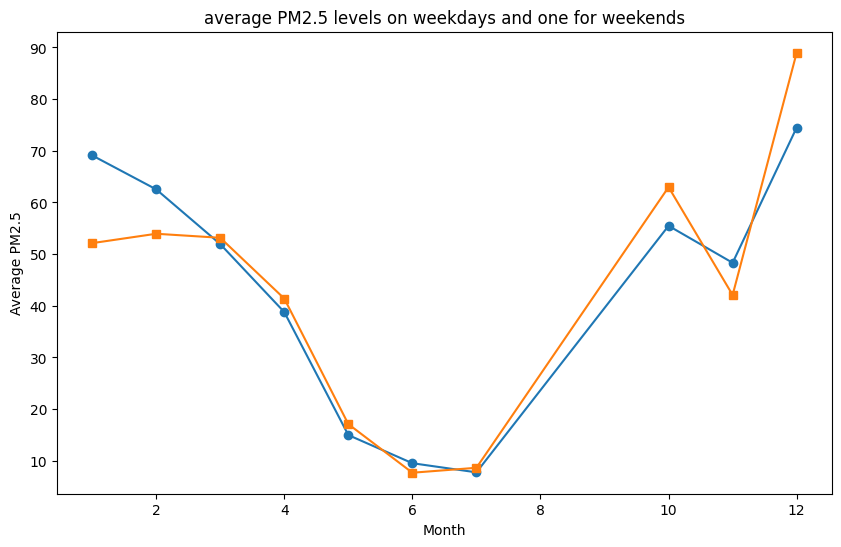

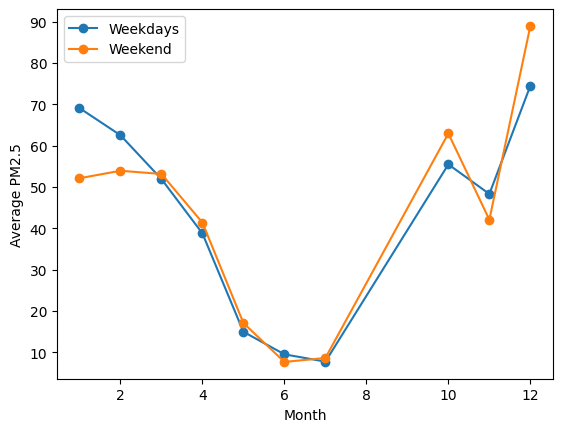

In [9]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='mixed')
station='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'
year_2021=df[(df['station']==station) & (df['Timestamp'].dt.year==2021)].copy()

year_2021['Month']=year_2021['Timestamp'].dt.month
year_2021['Day_of_week']=year_2021['Timestamp'].dt.dayofweek
year_2021['Day']=np.where(year_2021['Day_of_week']>=5,'Weekend','Weekdays')
average_month=year_2021.groupby(['Month','Day'])['PM2.5'].mean().unstack()
print(year_2021.groupby(['Month','Day'])['PM2.5'].mean())
print(average_month)
plt.figure(figsize=(10,6))
plt.plot(average_month.index,average_month['Weekdays'],label='Weekdays',marker='o')
plt.plot(average_month.index,average_month['Weekend'],label='Weekend',marker='s')
plt.title('average PM2.5 levels on weekdays and one for weekends')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
average_month.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
# plt.xtrick(range(1,13))
plt.legend()
plt.show()

**Spatio-temporal aggregation**

In [ ]:
Summarizing data across different geographic locations

For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [10]:


import pandas as pd
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

# Filter data for the year 2022
df_2022 = df[df['Timestamp'].dt.year == 2022].copy()

# Define function to categorize Summer (March-May) & Monsoon (June-September)
def get_season(month):
    if month in [3, 4, 5]:  
        return 'Summer'
    elif month in [6, 7, 8, 9]:  
        return 'Monsoon'
    else:  
        return None  
# Apply season categorization
df_2022['Season'] = df_2022['Timestamp'].dt.month.apply(get_season)
# Remove rows where Season is None (not Summer or Monsoon)
df_2022 = df_2022.dropna(subset=['Season'])

# Remove NaN values from PM2.5
df_2022 = df_2022.dropna(subset=['PM2.5'])

# Calculate average PM2.5 by State & Season
seasonal_avg = df_2022.groupby(['state', 'Season'])['PM2.5'].mean().unstack()

# Compute percentage change: ((Monsoon - Summer) / Summer) * 100
seasonal_avg['% Change'] = ((seasonal_avg['Monsoon'] - seasonal_avg['Summer']) / seasonal_avg['Summer']) * 100

# Identify the state with the maximum absolute percentage difference
most_difference_state = seasonal_avg['% Change'].abs().idxmax()
highest_difference_value = seasonal_avg.loc[most_difference_state, '% Change']

# Print results
print(f"The state with the most difference in PM2.5 levels (increase or decrease) during Monsoon compared to Summer in 2022 is {most_difference_state}, with a change of {highest_difference_value:.2f}%.")

# print(average_season)

The state with the most difference in PM2.5 levels (increase or decrease) during Monsoon compared to Summer in 2022 is Assam, with a change of -61.18%.


Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

Season       Monsoon     Summer      Winter
Timestamp                                  
2017       52.058519  98.525562  168.601736
2018       51.366940  92.307981  189.692843
2019       46.200330  84.982546  179.034521
2020       38.362705  53.583184  158.383736
2021       41.243770  78.184788  182.867699
2022       42.769572  95.667628  147.476104
2023       40.538087  70.216212  166.011412


<Figure size 1000x600 with 0 Axes>

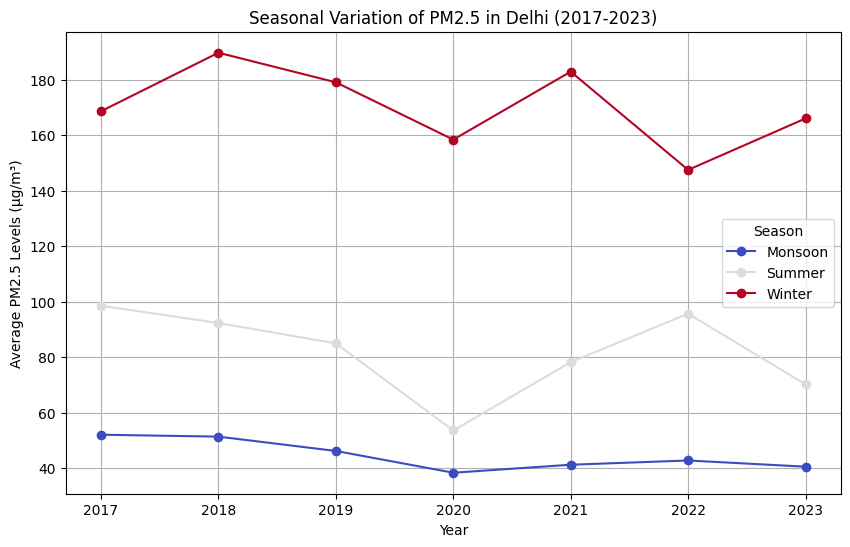

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')

df_delhi = df[(df['state'] == 'Delhi') & (df['Timestamp'].dt.year.between(2017, 2023))].copy()

def get_season(month):
    if month in [12, 1, 2]:  
        return 'Winter'
    elif month in [3, 4, 5]:  
        return 'Summer'
    elif month in [6, 7, 8, 9]:  
        return 'Monsoon'
    else:  
        return None  # Ignore October-November

df_delhi['Season'] = df_delhi['Timestamp'].dt.month.apply(get_season)

# Remove NaN PM2.5 values and filter only the defined seasons
df_delhi = df_delhi.dropna(subset=['PM2.5'])
df_delhi = df_delhi[df_delhi['Season'].notna()]
seasonal_avg = df_delhi.groupby([df_delhi['Timestamp'].dt.year, 'Season'])['PM2.5'].mean().unstack()
print(seasonal_avg)
# Plot the seasonal variation
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='line', marker='o', colormap='coolwarm', figsize=(10, 6))

plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.title("Seasonal Variation of PM2.5 in Delhi (2017-2023)")
plt.legend(title="Season")
plt.grid(True)
plt.show()


Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

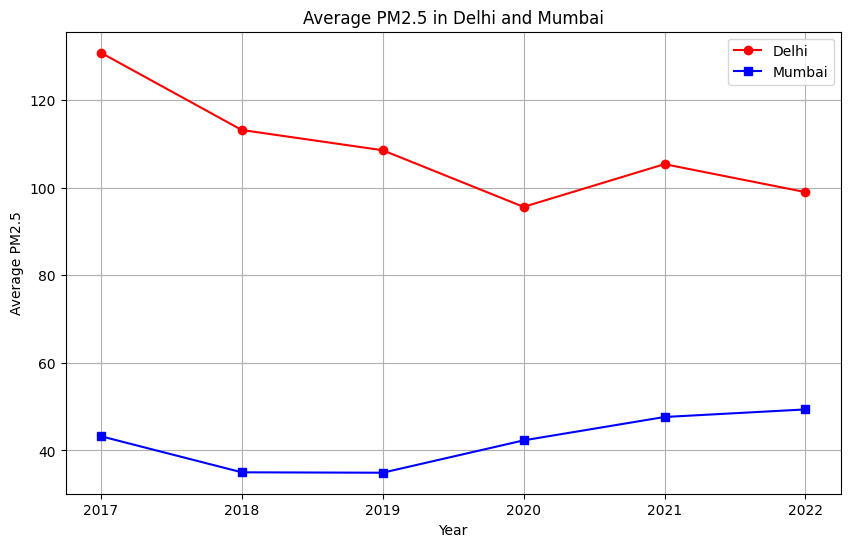

In [109]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='mixed')
year_15to23=df[(df['Timestamp'].dt.year>=2015) & (df['Timestamp'].dt.year<=2023)]
delhi_df=year_15to23[year_15to23['city']=='Delhi'].copy()
Mumbai_df=year_15to23[year_15to23['city']=='Mumbai'].copy()
def year(year):
  if year==2017:
    return '2017'
  if year==2018:
    return '2018'
  if year==2019:
    return '2019'
  if year==2020:
    return '2020'
  if year==2021:
    return '2021'
  if year==2022:
    return '2022'
delhi_df['Year']=delhi_df['Timestamp'].dt.year.apply(year)
Mumbai_df['Year']=Mumbai_df['Timestamp'].dt.year.apply(year)
delhi_avg=delhi_df.groupby('Year')['PM2.5'].mean()
Mumbai_avg=Mumbai_df.groupby('Year')['PM2.5'].mean()
plt.figure(figsize=(10,6))
plt.plot(delhi_avg.index,delhi_avg.values,label='Delhi',marker='o',color='red')
plt.plot(Mumbai_avg.index,Mumbai_avg.values,label='Mumbai',marker='s',color='blue')
plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 in Delhi and Mumbai")
plt.legend()
plt.grid(True)
plt.show()

**Polulation based**


Which state in India has the highest number of monitoring stations relative to its population? 

In [12]:
sort_state = df.groupby('state')['station'].nunique().reset_index()
print(sort_state)
population.rename(columns={'State': 'state'}, inplace=True)
population['Population'] = pd.to_numeric(population['Population'], errors='coerce')
sort_state['state'] = sort_state['state'].str.strip().str.lower()
population['state'] = population['state'].str.strip().str.lower()
merged_data = pd.merge(sort_state, population, on='state', how='inner')
merged_data['Ratio'] = merged_data['station'] / merged_data['Population']
highest_ratio_state = merged_data.loc[merged_data['Ratio'].idxmax()]

print(f"State with the highest number of monitoring stations relative to population is {highest_ratio_state['state']} with ratio {highest_ratio_state['Ratio']} ")

                state  station
0      Andhra Pradesh       13
1   Arunachal Pradesh        1
2               Assam        9
3               Bihar       36
4          Chandigarh        3
5        Chhattisgarh       14
6               Delhi       40
7             Gujarat       17
8             Haryana       30
9    Himachal Pradesh        1
10  Jammu and Kashmir        1
11          Jharkhand        4
12          Karnataka       40
13             Kerala        9
14     Madhya Pradesh       29
15        Maharashtra       97
16            Manipur        2
17          Meghalaya        2
18            Mizoram        1
19           Nagaland        1
20             Odisha       19
21         Puducherry        1
22             Punjab        8
23          Rajasthan       46
24             Sikkim        1
25         Tamil Nadu       35
26          Telangana       14
27            Tripura        2
28      Uttar Pradesh       57
29        Uttarakhand        3
30        West Bengal       22
State wi

Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


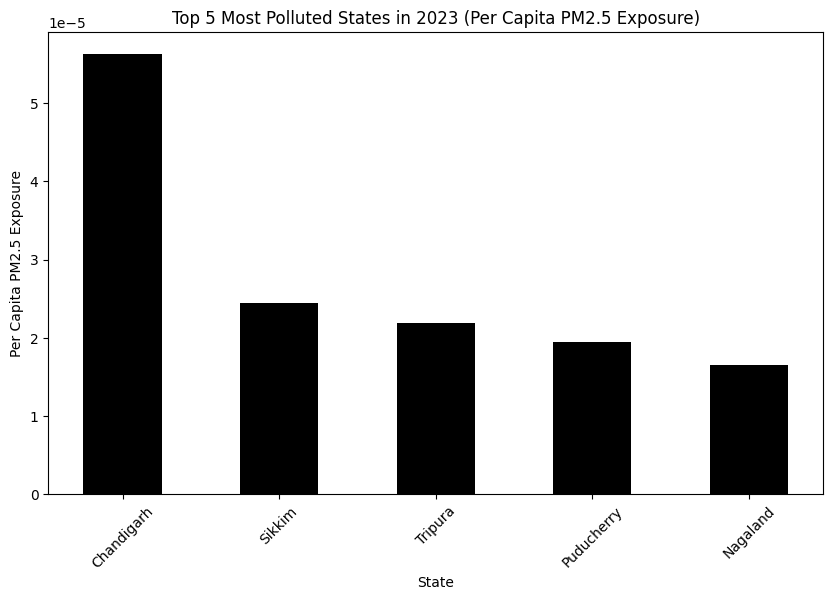

In [101]:

population.rename(columns={'State': 'state'}, inplace=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
data_2023 = df[df['Timestamp'].dt.year == 2023].copy()
req_data=data_2023.groupby('state')['PM2.5'].mean().reset_index()
merged_data=pd.merge(req_data, population ,on='state' , how='inner')
merged_data['PM2.5 per Capita']=merged_data['PM2.5'] / merged_data['Population']
top_5 = merged_data.nlargest(5, 'PM2.5 per Capita')
plt.figure(figsize=(10, 6))
plt.bar(top_5['state'].str.title(), top_5['PM2.5 per Capita'], color='black' ,width=0.5 )
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in 2023 (Per Capita PM2.5 Exposure)')
plt.xticks(rotation=45)
plt.show()

Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

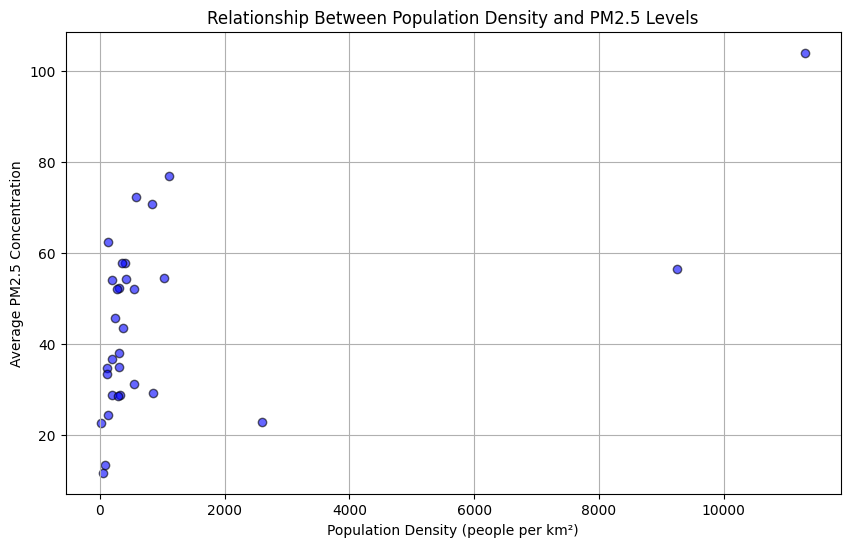

In [32]:
#3
'''X-axis: Population density (people per square kilometer).
Y-axis: Average PM2.5 concentration.
Use a scatter plot to show the relationship, where each point represents a state.'''

population.rename(columns={'State': 'state'}, inplace=True)
population['Population_Density']=population['Population']/population['Area (km2)']
data_avg=df.groupby('state')['PM2.5'].mean()
merged_data = pd.merge(population, data_avg, on='state', how='inner')
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Population_Density'], merged_data['PM2.5'], color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Relationship Between Population Density and PM2.5 Levels')
plt.grid(True)
plt.show()


**Area Based**

Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

In [33]:
population.rename(columns={'State': 'state'}, inplace=True)
merge_data=pd.merge(df,population, on='state', how='inner')

merge_data['pm2.5_per_km']=merge_data['PM2.5']/merge_data['Area (km2)']
avg=merge_data.groupby('state')['pm2.5_per_km'].mean()
# req_state=avg.idxmax()
req_value=avg.max()
print(f"The state which has the highest PM2.5 concentration per square kilometer is {req_value}")
import pandas as pd

# Ensure column names match
population.rename(columns={'State': 'state'}, inplace=True)
merge_data = pd.merge(df, population, on='state', how='inner')
# Avoid division by zero
merge_data = merge_data[merge_data['Area (km2)'] > 0]
merge_data['pm2.5_per_km'] = merge_data['PM2.5'] / merge_data['Area (km2)']
avg_pm2_5 = merge_data.groupby('state')['pm2.5_per_km'].mean()
req_state = avg_pm2_5.idxmax()
req_value = avg_pm2_5.max()

print(f"The state with the highest PM2.5 concentration per km² is {req_state} with {req_value:.2f} µg/km².")


The state which has the highest PM2.5 concentration per square kilometer is 0.4970772156030418
The state with the highest PM2.5 concentration per km² is Chandigarh with 0.50 µg/km².


Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


The state with the highest density of monitoring stations relative to its area is Delhi i.e 0.026954177897574125


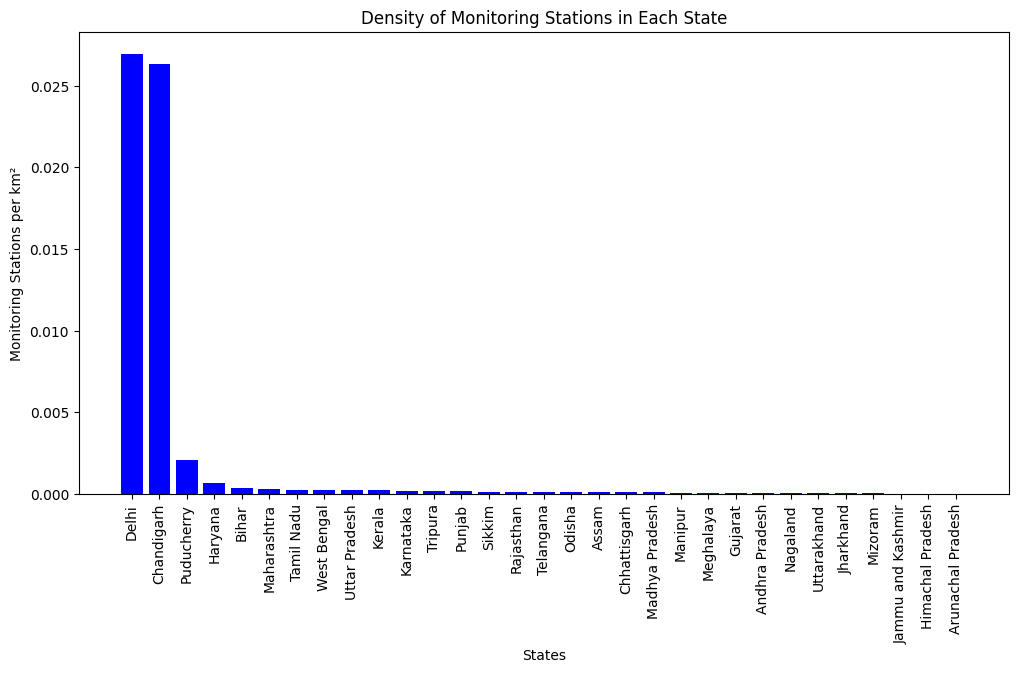

In [15]:
no_of_stations=df.groupby('state')['station'].nunique()
no_of_stations=no_of_stations.reset_index(name='no_of_stations')
merge_data=pd.merge(no_of_stations,population, on='state', how='inner')
merge_data['per_sq_km']=merge_data['no_of_stations']/merge_data['Area (km2)']
Req_index=merge_data['per_sq_km'].idxmax()
Req_state=merge_data['state'][Req_index]
Req_value=merge_data['per_sq_km'].max()
print(f"The state with the highest density of monitoring stations relative to its area is {Req_state} i.e {Req_value}")
plt.figure(figsize=(12, 6))
merge_data = merge_data.sort_values(by='per_sq_km', ascending=False)  # Sort for better visualization
plt.bar(merge_data['state'], merge_data['per_sq_km'], color='blue')
plt.xlabel("States")
plt.ylabel("Monitoring Stations per km²")
plt.title("Density of Monitoring Stations in Each State")
plt.xticks(rotation=90)
plt.show()

 Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


In [18]:

df['Timestamp']=pd.to_datetime(df['Timestamp'], format='mixed')
popu_Mah = int(population.loc[population['state'] == 'Maharashtra', 'Population'].values[0])
popu_Mp = int(population.loc[population['state'] == 'Madhya Pradesh', 'Population'].values[0])
data_2021 = df[(df['Timestamp'].dt.year == 2021) & ((df['state'] == 'Maharashtra') | (df['state'] == 'Madhya Pradesh'))]

avg=data_2021.groupby('state')['PM2.5'].mean()
Max_state=avg.idxmax()
Max_value=avg.max()

print(f"State with highest PM2.5 levels in 2021: {Max_state} ({Max_value:.2f} µg/m³)")
print(f"Average PM2.5 levels in Maharashtra: {avg['Maharashtra']:.2f} µg/m³")
print(f"Average PM2.5 levels in Madhya Pradesh: {avg['Madhya Pradesh']:.2f} µg/m³")
print(f"Population in Maharashtra {popu_Mah}")
print(f"Population in Madhya Pradesh {popu_Mp}")
# Analysis of population density impact on PM2.5 levels
if popu_Mah > popu_Mp and avg['Maharashtra'] > avg['Madhya Pradesh']:
    print("Higher population density in Maharashtra may contribute to higher PM2.5 levels due to more vehicular and industrial emissions.")
elif popu_Mah < popu_Mp and avg['Maharashtra'] < avg['Madhya Pradesh']:
    print("Despite a lower population density, Madhya Pradesh has higher pollution levels, suggesting other factors like industrial activity and meteorological conditions play a role.")
else:
    print("Pollution levels do not directly correlate with population density, indicating that other factors like industries, vehicle emissions, and weather patterns influence air quality.")

State with highest PM2.5 levels in 2021: Madhya Pradesh (47.10 µg/m³)
Average PM2.5 levels in Maharashtra: 46.44 µg/m³
Average PM2.5 levels in Madhya Pradesh: 47.10 µg/m³
Population in Maharashtra 112374333
Population in Madhya Pradesh 72626809
Pollution levels do not directly correlate with population density, indicating that other factors like industries, vehicle emissions, and weather patterns influence air quality.


**Funding Based**


Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [57]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], format='mixed')
data_2021 = df[(df['Timestamp'].dt.year == 2021)].copy()
ncap['Amount released during FY 2021-22']=(ncap['Amount released during FY 2021-22'].replace('-',float("nan")).astype('float').fillna(0))
funded_states= set(ncap[ncap['Amount released during FY 2021-22']>0]['State'].unique())
def categorize_state(state):
  return 'Funded' if state in funded_states else 'not funded'
data_2021['Funding Status']=data_2021['state'].apply(categorize_state)
avg_pm=data_2021.groupby('Funding Status')['PM2.5'].mean()
print("avg PM2.5 in 2021\n",avg_pm)

avg PM2.5 in 2021
 Funding Status
Funded        65.352193
not funded    55.346279
Name: PM2.5, dtype: float64


Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

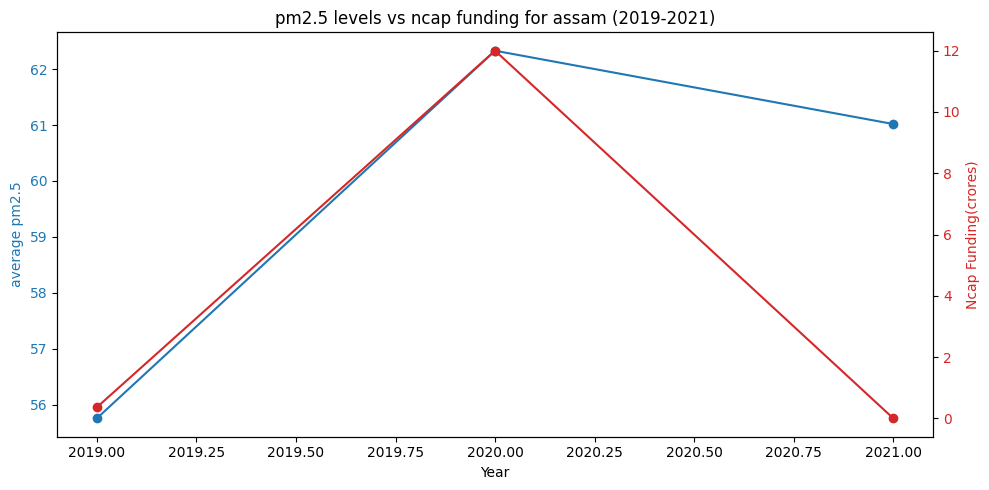

In [100]:
#2  create a time series plot showing pm2.5 levels with an increment in ncap funding for assam .
import pandas as pd
import matplotlib.pyplot as plt
ncap_assam = ncap[ncap['State']=='Assam'].copy()
#2 define funding columns
funding_cols=['Amount released during FY 2019-20',
               'Amount released during FY 2020-21',
               'Amount released during FY 2021-22']
#3 converting funding data to numeric, replacing '-' with NaN first
# ncap_assam[funding_cols]=(ncap_assam[funding_cols].replace('-',float("nan")).astype('float').fillna(0))
ncap_assam[funding_cols] = ncap_assam[funding_cols].replace('-', float("nan"))
ncap_assam[funding_cols] = ncap_assam[funding_cols].apply(pd.to_numeric, errors='coerce').fillna(0)


#4 summing funding per year 
yearly_fund=pd.DataFrame(ncap_assam[funding_cols].sum()).reset_index()
yearly_fund.columns =['Year','Funding (Crores)']
yearly_fund['Year'] = yearly_fund['Year'].str.extract(r'(\d{4})').astype(int)
#5 process pm2.5 data
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='mixed')
data_assam=df[(df['state']=='Assam')].copy()
data_assam['Year']=data_assam['Timestamp'].dt.year
data_assam['Month']=data_assam['Timestamp'].dt.month
data_assam['Day']=data_assam['Timestamp'].dt.day
#6 compute yearly avreage pm2.5 levels
assam_pm25=data_assam.groupby('Year')['PM2.5'].mean().reset_index()
merged_data=pd.merge(assam_pm25,yearly_fund, on='Year', how='inner')
#8 plot time series with dual y-axis
fig,ax1=plt.subplots(figsize=(10,5))
# plot pm2.5 levels

ax1.set_xlabel('Year')
ax1.set_ylabel('average pm2.5', color='tab:blue')
ax1.plot(merged_data['Year'],merged_data['PM2.5'], marker='o',linestyle='-',color='tab:blue', label='pm2.5 levels')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# create a secind axis for ncap funding
ax2=ax1.twinx()
ax2.set_ylabel('Ncap Funding(crores)', color='tab:red')

ax2.plot(merged_data['Year'],merged_data['Funding (Crores)'], marker='o',linestyle='-',color='tab:red', label='Ncap Funding')
ax2.tick_params(axis='y', labelcolor='tab:red')
#finalizing plot
plt.title("pm2.5 levels vs ncap funding for assam (2019-2021)")
plt.tight_layout()
plt.show()

Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

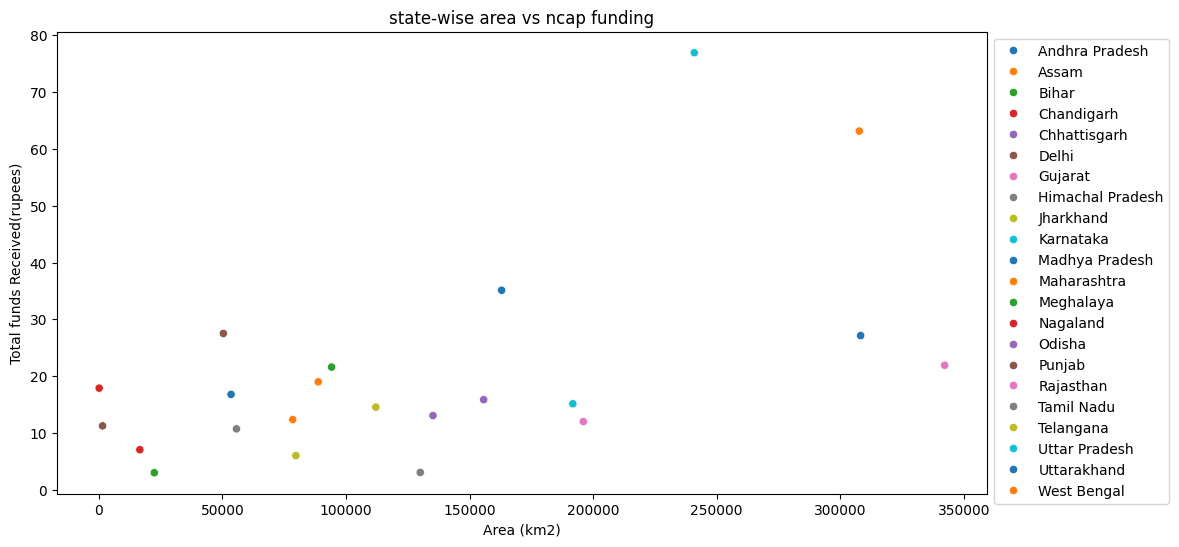

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
funding_cols=['Amount released during FY 2019-20',
              'Amount released during FY 2020-21',
              'Amount released during FY 2021-22']
ncap[funding_cols]= ncap[funding_cols].apply(pd.to_numeric, errors='coerce')
ncap['Total funds']=ncap[funding_cols].sum(axis=1)
# req=pd.DataFrame(ncap.groupby('State')['Total funds'].sum()).reset_index()
req=pd.DataFrame(ncap.groupby('State')['Total funds'].sum()).reset_index()
merged_data=pd.merge(req,population,on='State',how='inner')  
plt.figure(figsize=(12,6)) 
sns.scatterplot(data=merged_data,
                x='Area (km2)',
                y='Total funds',
                hue='State',
                palette='tab10') 
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Area (km2)')
plt.ylabel('Total funds Received(rupees)')
plt.title ("state-wise area vs ncap funding")
plt.show()


**Miscellaneous Questions**


For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [18]:
import pandas as pd

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

if 'city' in df.columns:
    df.rename(columns={'city': 'City'}, inplace=True)
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

df.dropna(subset=['Timestamp', 'PM2.5'], inplace=True)

# Filter for 2023
data_2023 = df[df['Timestamp'].dt.year == 2023]

if data_2023.empty or data_2023['PM2.5'].isna().all():
    print("No valid pollution data available for 2023.")
else:
    # Find the most polluted city
    most_polluted_city_2023 = data_2023.groupby('City')['PM2.5'].mean().idxmax()
    data_city=data_2023[data_2023['city'== hazardous_days_city].copy()
    # Count hazardous days (PM2.5 > 300) in that city
    hazardous_days_city = data_2023[(data_2023['City'] == most_polluted_city_2023) & (data_2023['PM2.5'] > 300)]

    # Calculate total days recorded for that city
    data_city=data_2023[data_2023['city'== hazardous_days_city].copy()
    total_days_city = data_2023[data_2023['City'] == most_polluted_city_2023]

    # Calculate percentage of hazardous days
    percentage_hazardous_days = (len(hazardous_days_city) / len(total_days_city)) * 100 if len(total_days_city) > 0 else 0

    print(f"Most polluted city in 2023: {most_polluted_city_2023}")
    print(f"Percentage of hazardous days in {most_polluted_city_2023}: {percentage_hazardous_days:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of hazardous days in Darbhanga: 23.08%


Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[

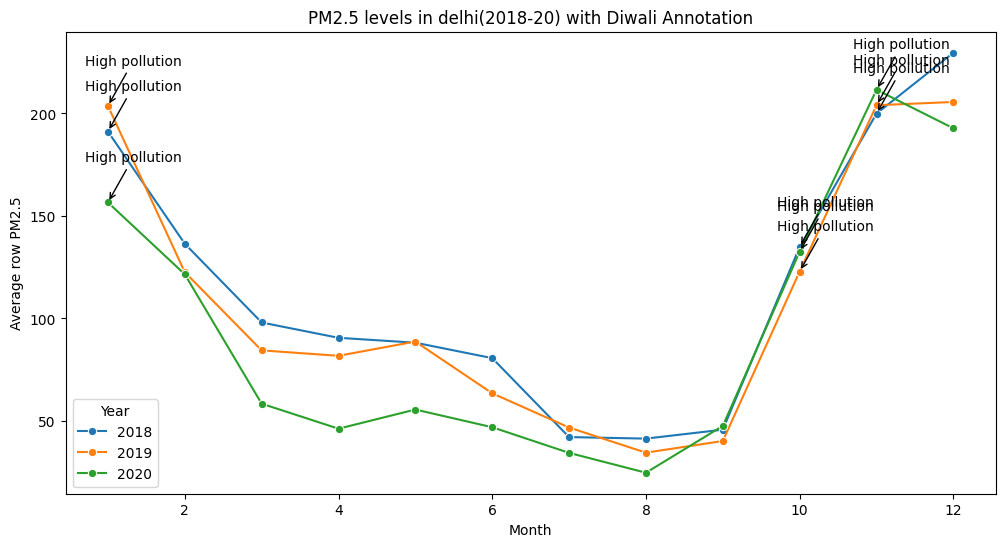

In [81]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed')
delhi_data = df[(df['city'] == 'Delhi') & (df['Timestamp'].dt.year.isin([2018, 2019, 2020]))].copy()
delhi_data['Year'] = delhi_data['Timestamp'].dt.year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Day'] = delhi_data['Timestamp'].dt.day
monthly_avg = delhi_data.groupby(['Year', 'Month'])['PM2.5'].mean().reset_index()
di_wali = [(10, 11)]
new_year = [(1,)]
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x= 'Month', y='PM2.5', hue= 'Year', marker= 'o', palette='tab10')
di_wali_months = [10,11,1]
for year in [2018, 2019, 2020]:
    diwali_data = monthly_avg[(monthly_avg['Year'] == year) & (monthly_avg['Month'].isin(di_wali_months))]
    for _, row in diwali_data.iterrows():
        plt.annotate('High pollution', 
                     xy=(row['Month'], row['PM2.5']), 
                     xytext=(row['Month']-0.3, row['PM2.5'] + 20),
                     arrowprops=dict(facecolor='green', arrowstyle='->'))
plt.xlabel('Month')
plt.ylabel('Average row PM2.5')
plt.title('PM2.5 levels in delhi(2018-20) with Diwali Annotation')
plt.legend(title='Year')
plt.show()

Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

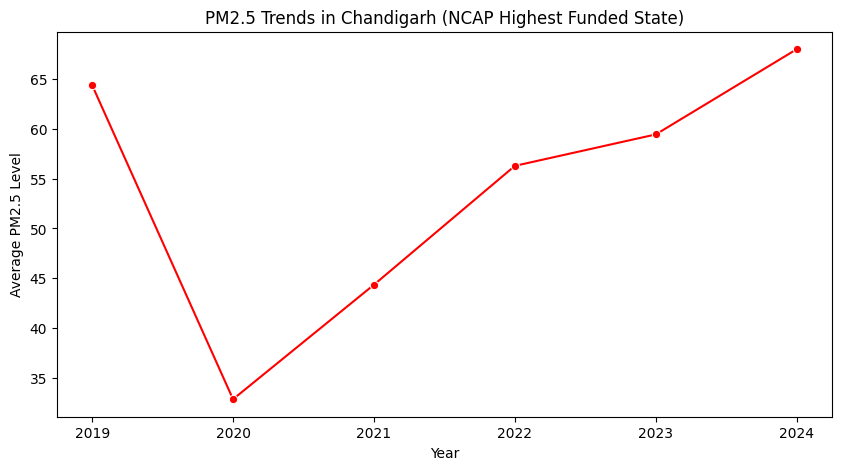

In [82]:
ncap_state=ncap.groupby('State')['Amount released during FY 2020-21'].mean()
req_state=ncap_state.idxmax()
df['Timestamp']=pd.to_datetime(df['Timestamp'],format='mixed')
data_state=df[df['state']==req_state].copy()
if ncap_state.empty:
    print("No funding data available for any state.")
else:
    
    data_state['Year'] = data_state['Timestamp'].dt.year
    yearly_data = data_state.groupby('Year')['PM2.5'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_data, x='Year', y='PM2.5', marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title(f'PM2.5 Trends in {req_state} (NCAP Highest Funded State)')
plt.show()


Draw the map of India and plot the sensor locations on the map

India Shapefile Columns: Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)
        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sove

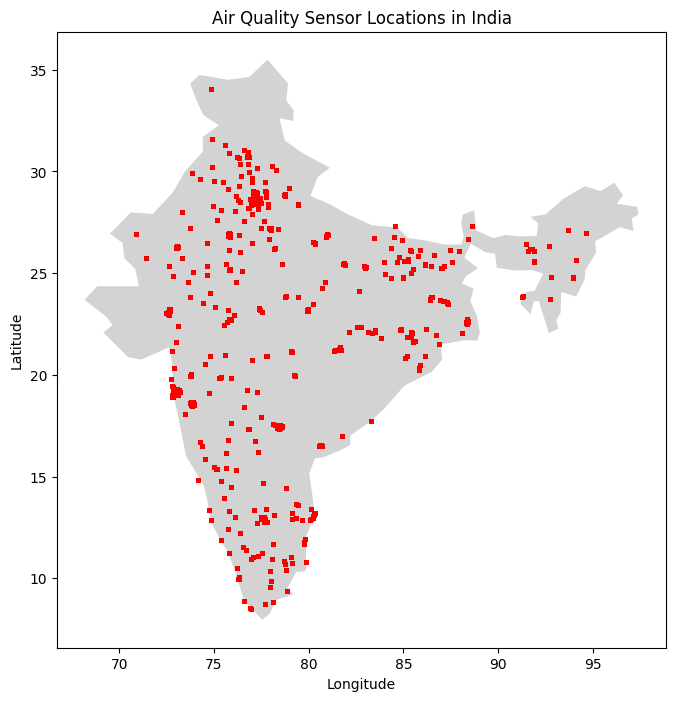

In [119]:
import geopandas as gpd
import pandas as pd

# Load the India shapefile (Make sure the file path is correct)
india_shapefile_path =r'C:\Users\alan1\Downloads\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp'

india = gpd.read_file(india_shapefile_path)

# Inspect the first few rows and columns to check for country name column
print("India Shapefile Columns:", india.columns)
print(india.head())  

# Assuming the country name column is 'NAME', update if necessary
india = india[india['NAME'] == "India"]  # Replace 'NAME' with the actual column name if different

# Make sure the CRS is consistent (WGS84)
india = india.to_crs(epsg=4326)

# Now, inspect the 'data' DataFrame
print("Data Columns:", df.columns)
print(df.head())  # This will print the first few rows to understand the structure

# Check if 'latitude' and 'longitude' columns exist (lowercase)
if 'latitude' in df.columns and 'longitude' in df.columns:
    sensor_locations = df[['latitude', 'longitude']].dropna()  # Extract lat/lon values
else:
    print("No 'latitude' and 'longitude' columns found in the data.")
    # Check if there are any other potential columns for lat/lon
    print("Possible columns in 'data':", df.columns)

# If lat/lon columns exist, proceed with GeoDataFrame creation
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Ensure that 'latitude' and 'longitude' are numeric
    sensor_locations['latitude'] = pd.to_numeric(sensor_locations['latitude'], errors='coerce')
    sensor_locations['longitude'] = pd.to_numeric(sensor_locations['longitude'], errors='coerce')

    # Create GeoDataFrame for the sensor locations
    sensor_gdf = gpd.GeoDataFrame(sensor_locations, geometry=gpd.points_from_xy(sensor_locations.longitude, sensor_locations.latitude))

    # Set the correct CRS for the sensor GeoDataFrame
    sensor_gdf = sensor_gdf.set_crs('EPSG:4326', allow_override=True)

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 8))
    india.plot(ax=ax, color='lightgrey')
    sensor_gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)

    plt.title("Air Quality Sensor Locations in India")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
   

Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

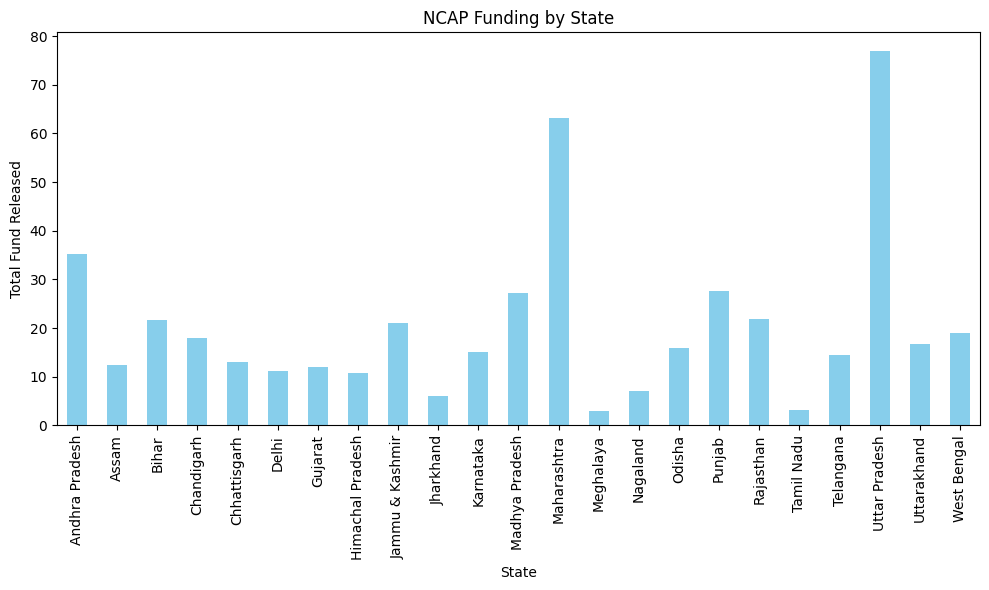

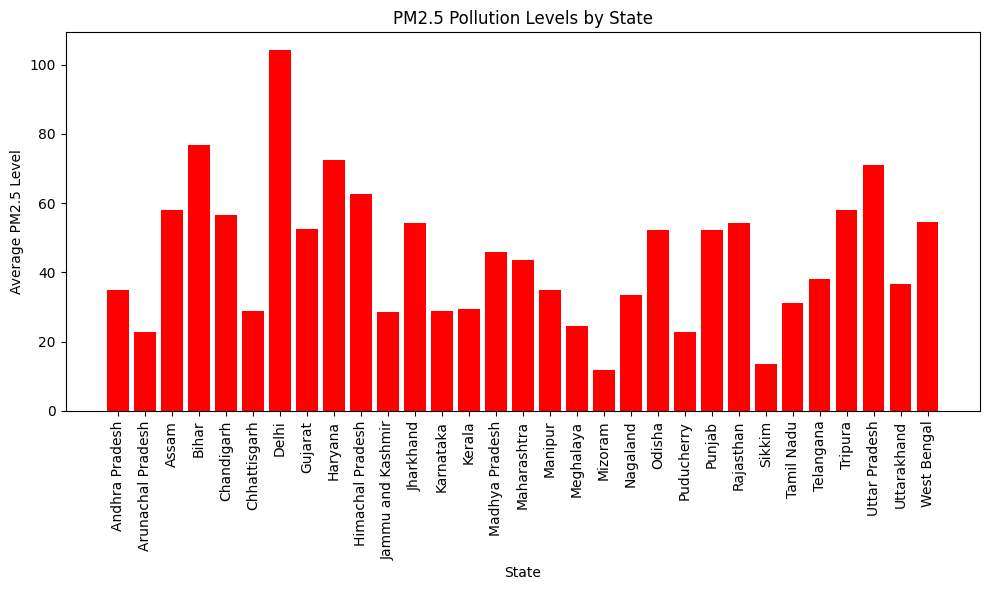

In [124]:

#Do cities that received higher NCAP funding actually show a decline in pollution?

funding_vs_pm25 = ncap.groupby('State')['Total fund released'].sum()

# Plotting the funding data
funding_vs_pm25.plot(kind='bar', color='skyblue', figsize=(10, 6))

plt.title('NCAP Funding by State')
plt.xlabel('State')
plt.ylabel('Total Fund Released')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Group PM2.5 levels by state (assuming you have a column named 'PM2.5 Level')
pm25_levels = df.groupby('state')['PM2.5'].mean()  

# Plot PM2.5 pollution levels
plt.figure(figsize=(10, 6))
plt.bar(pm25_levels.index, pm25_levels, color='red')
plt.xlabel('State')
plt.ylabel('Average PM2.5 Level')
plt.title('PM2.5 Pollution Levels by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# from the above 2 graphs(from above 2 codes) we can observe that the state which has more funding doesn't mean that 
#the state will not have a high amount of pollution.for example take uttarpradesh,inspite of receiving high funds its pollution levels are also high.